# ÖDEV-4 EK ÇALIŞMA:

## Soru-2) 

### $ H(z) = \frac{z^2}{(z+1)(z-1)^2} $ ifadesini basit kesirlere ayırma yönteminden yararlanarak paydalara ayıracağız;

### $ H(z) = \frac{z^2}{(z+1)(z-1)^2} = \frac{A}{z+1} + \frac{B}{z-1} + \frac{C}{(z-1)^2} $ 
### şeklinde paydalara ayırarak A,B ve C katsayılarını bulacağız.

### A için:
#### $ H(z)*(z+1)|_{z = -1} = \frac{z^2}{(z-1)^2}|_{z = -1} =A= \frac{1}{4} $
### B için:
#### $ \frac {d[H(z)*(z-1)^2]}{dz}|_{z = 1} = \frac{ 2z*(z+1) - z^2}{(z+1)^2}|_{z = 1} = B = \frac{3}{4} $
### C için:
#### $ H(z)*(z-1)^2|_{z = 1} = \frac{z^2}{(z+1)}|_{z = 1} =C= \frac{1}{2} $
## H(z) için değerler yerine konulursa:
##### $ H(z) = \frac{z^2}{(z+1)(z-1)^2} = \frac{\frac{1}{4}}{z+1} + \frac{\frac{3}{4}}{z-1} + \frac{\frac{1}{2}}{(z-1)^2} = H_1(z) +  H_2(z) +  H_3(z) $ 

#### $ H_1(z) = \frac{\frac{1}{4}}{z+1} =\frac{1}{4} z^{-1}\frac{z}{z+1}\Rightarrow h_1[n] = \frac{1}{4}(-1)^{n-1}u[n-1]$

#### $ H_2(z) = \frac{\frac{3}{4}}{z-1} =\frac{3}{4} z^{-1}\frac{z}{z-1}\Rightarrow h_2[n] = \frac{3}{4}(1)^{n-1}u[n-1] $

##### $ H_3(z) = \frac{\frac{1}{2}}{(z-1)^2} =\frac{1}{2} z^{-2}\frac{z^2}{(z-1)^2}\Rightarrow h_3[n] = \frac{1}{2} (n-1)(1)^{n-1}u[n-1]$

$ H(z) = H_1(z)+H_2(z)+H_3(z) \Rightarrow h[n] = h_1[n]+h_2[n]+h_3[n]$

##### $ h[n] = \frac{1}{4}(-1)^{n-1}u[n-1] + \frac{3}{4}(1)^{n-1}u[n-1] + \frac{1}{2} (n-1)(1)^{n-1}u[n-1] $

#### olarak bulunur.

#### Son olarak:

### $ h[n] = \frac{1}{4}(-1)^{n-1}u[n-1] + \frac{3}{4}(1)^{n-1}u[n-1] + \frac{1}{2} (n-1)(1)^{n-1}u[n-1] $ 

## Z-Plane Code 

In [2]:
# alternative syntax: from scipy import signal as sgnl

def zplane(b,a):

	# Input: numerator and denominator coefficients:
	zeross,poless,k = sgnl.tf2zpk(b, a)
	if not zeross.size:
		zeross = np.zeros(len(poless))
		
	if not poless.size:
		poless = np.zeros(len(zeross))

	tol = 1e-4

	real_p = np.real(poless).copy()
	real_z = np.real(zeross).copy()
	imag_p = np.imag(poless).copy()
	imag_z = np.imag(zeross).copy()

	if not real_z.size:
		real_z[abs(real_z) < tol] = 0
	if not imag_z.size:
		imag_z[abs(imag_z) < tol] = 0
	if not real_p.size:
		real_p[abs(real_p) < tol] = 0
	if not imag_p.size:
		imag_p[abs(imag_p) < tol] = 0

	z = np.round(real_z,2) + 1j*np.round(imag_z,2)
	p = np.round(real_p,2) + 1j*np.round(imag_p,2)

	# plot the unit circle
	N = 128
	m = np.arange(0,N,1)
	unitCircle = np.exp(1j*m*2*np.pi/N)

	plt.figure()
	plt.plot(np.real(unitCircle), np.imag(unitCircle), 'b--', linewidth=0.3)
	plt.xlabel('Real Part'), plt.ylabel('Imaginary Part')

	# calculate the plot limits
	Cz, z_counts = np.unique(z, return_counts=True)
	Cp, p_counts = np.unique(p, return_counts=True)

	zz = [idx1 for idx1, valz in enumerate(z_counts) if valz > 1]
	pp = [idx2 for idx2, valp in enumerate(p_counts) if valp > 1]
	zval = z_counts[zz]
	pval = p_counts[pp]
	zs = Cz[zz]
	ps = Cp[pp]

	real_roots = np.concatenate((np.real(p),np.real(z)))
	imag_roots = np.concatenate((np.imag(p),np.imag(z)))

	# adjust plot limits
	xlower = min(-1, min(real_roots)) - 0.3
	xupper = max(1,  max(real_roots)) + 0.3
	ylower = min(-1, min(imag_roots)) - 0.3
	yupper = max(1,  max(imag_roots)) + 0.3
	plt.xlim(xlower, xupper), plt.ylim(ylower, yupper)

	# plot axes
	Xaxis = np.arange(xlower, xupper, 0.1)
	Yaxis = np.arange(ylower, yupper, 0.1)
	plt.plot(np.real(Xaxis), np.imag(Xaxis), 'b--', linewidth=0.3)
	plt.plot(np.imag(Yaxis), np.real(Yaxis), 'b--', linewidth=0.3)

	# plot poles and zeros
	plt.plot(np.real(z), np.imag(z), 'ro',  markerfacecolor = 'none')
	plt.plot(np.real(p), np.imag(p), 'rx')

	if zz:
		txtz = str(zval)[1:-1]
		plt.annotate(txtz, xy=(np.real(zs)+0.1,np.imag(zs)+0.1))
		
	if pp:
		txtp = str(pval)[1:-1]
		plt.annotate(txtp, xy=(np.real(ps)+0.1,np.imag(ps)+0.1))

	plt.grid()
	plt.show()



### Örnek-7'deki gibi çözüm: 

[0.75+0.j 0.5 +0.j 0.25+0.j]
[ 1.+0.j  1.+0.j -1.+0.j]
[]


Text(0.5, 1.0, "Örnek-7'deki gibi çözüm")

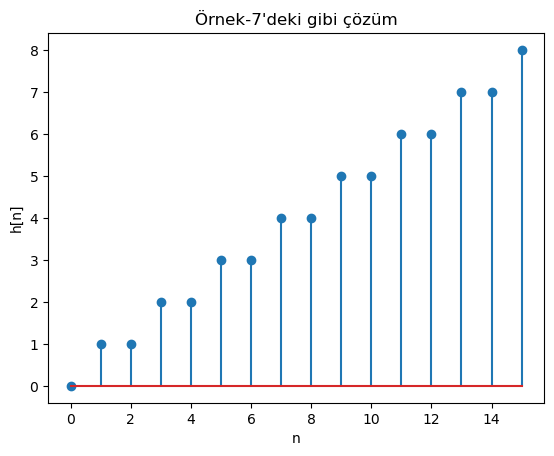

In [5]:

import numpy as np              # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary
import math 
import scipy.signal as sgnl 
import sys

#Birim Basamak Fonksiyonu
def step(n):
    if n >= 0:
        return 1
    else:
        return 0
    
z = np.array([0, 0])#Sıfırlar
p = np.array([-1, 1, 1])#Kutuplar
b, a = sgnl.zpk2tf(z, p, 1) #Kazanç yok bu yüzden k=1 
b,a
#Paydalara Ayırma İşlemi:
r, p, k = sgnl.residue(b,a) #
print(r)
print(p)
print(k)
#Kökler için
poless = np.roots(a)

n = np.linspace(0,15,16)

x = np.zeros(len(n))
for i in range(1,len(n)):
    x[i] = (1/4)*(math.pow(-1,(n[i-1]))*step(n[i-1])) + (3/4)*step(n[i-1]) + (1/2)*((n[i-1]))*step((n[i-1]))
    
plt.figure()
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Örnek-7'deki gibi çözüm")
#print(x)



#### r p ve k değerleri el ile elde edilen katsayılar ile uyuşmaktadır. Sanal kısımları 0 ile çarpıldığından bir değeri yoktur 

### Örnek-8'deki gibi çözüm

Text(0.5, 1.0, "Örnek-8'deki gibi çözüm")

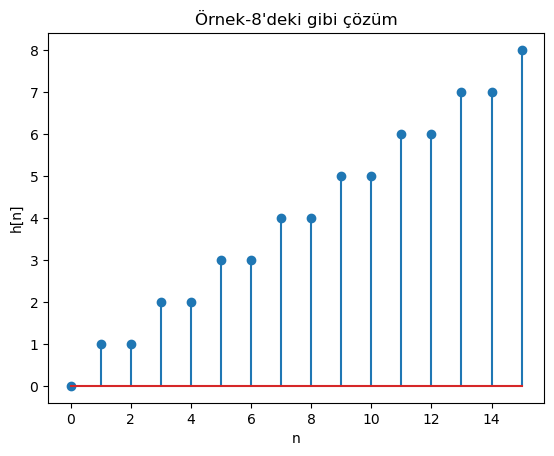

In [6]:
num   = np.array([0,  1, 0, 0]) 
denum = np.array([1, -1, -1, 1]) 
n, x = sgnl.dimpulse((num, denum, 1),x0=0, n=16)

#print(x)
plt.stem(n, np.squeeze(x))
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Örnek-8'deki gibi çözüm")
#print(np.squeeze(x))

### Örnek-9'deki gibi çözüm:

Text(0.5, 1.0, ' Ön Çalışma 8')

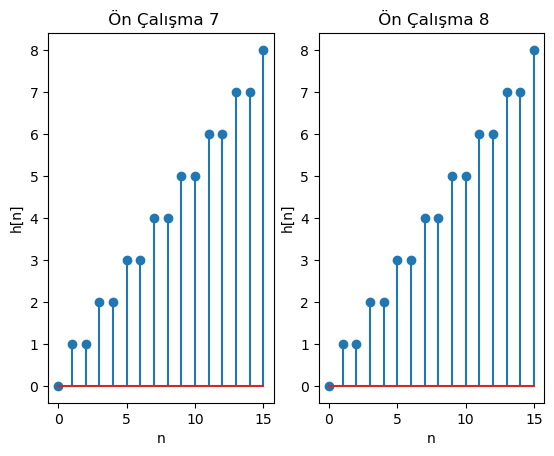

In [8]:
# ÖRNEK 7
n = np.linspace(0,15,16)
x = np.zeros(len(n))
for i in range(1,len(n)):
    x[i] = (1/4)*(math.pow(-1,(n[i-1]))*step(n[i-1])) + (3/4)*step(n[i-1]) + (1/2)*((n[i-1]))*step((n[i-1]))
    
    
# ÖRNEK 8
num   = np.array([0,  1, 0, 0]) # we add zeros to match the size of num and
denum = np.array([1, -1, -1, 1]) # coeffs of denum
n8, x8 = sgnl.dimpulse((num, denum, 1),x0=0, n=16)


plt.subplot(1,2,1)
plt.stem(n, x)
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title(" Ön Çalışma 7")

plt.subplot(1,2,2)
plt.stem(n8, np.squeeze(x8))
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title(" Ön Çalışma 8")



### Verilen ön çalışma kodları incelediğnde ve bu soru için elde ettiğimiz katsayılara uyarlandığında gözlemleyebilriiz ki elde ettiğimiz değerler ile elde ettiğimiz grafiklerin aynı olduğu gözlemlenmektedir. Buradan elde ettiğimiz sonucun doğru olduğunu çıkarabiliriiz. 

## Soru-3) 

####  $ H(z) = \frac{1 + 3z^{-1} + \frac{11}{6}z^{-2} + \frac{1}{3}z^{-3} }{1 + \frac{5}{6}z^{-1} + \frac{1}{6}z^{-2} } $ Bir önceki soru için ilgili basit kesirlere ayırma yöntemi uygulanıp katsayılar bulunmuş aynı işlemleri uyarlamadan önce paydanın derecesi paydan daha büyük olduğu için polinom bölmesi yapılmaktadır bu soru için uyarladığımızda aşağıdaki basit kesirlere ayrılmış ifade bulunur:

#### $ H(z) = 2z^{-1} + 1 + \frac{1}{1 + \frac{1}{3}z^{-1}} + \frac{1}{1 + \frac{1}{2}z^{-1}}$
#### Ters Z-Dönüşümü alınırsa:
#### $ h[n] = 2 \delta [n-1] + \delta [n] + (\frac{-1}{3})^n u[n] - (\frac{-1}{2})^n u[n] $ 

#### İfadesi elde edilir.

### Örnek-7'deki gibi çözüm: 

[ 0.99937851 -1.0006148 ]
[-0.33333333 -0.5       ]
[1.00123629 1.99937644]


Text(0.5, 1.0, "Örnek-7'deki gibi çözüm")

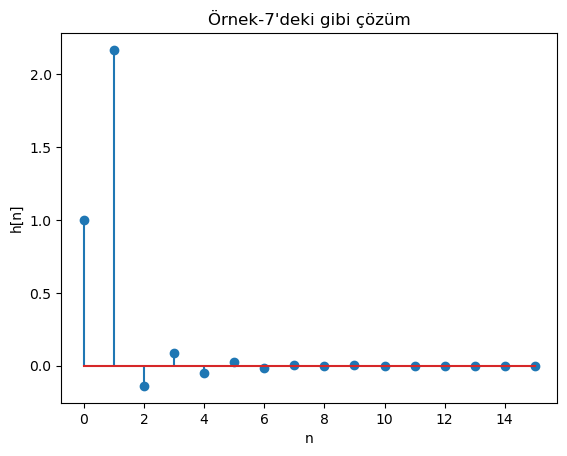

In [10]:
def dirac(m):
    if m == 0:
        return 1
    else:
        return 0
    
z = np.array([-2.251491,(-0.3742-0.089321j),(-0.3742+0.089321j)]) 
p = np.array([-1/2, -1/3])# Sistemin Kutupları
b, a = sgnl.zpk2tf(z, p, 1)#Kazanç yok bu yüzden k=1
b,a


#Kesirlere ayıracak olursak:
r, p, k = sgnl.residuez(b,a) 
print(r)
print(p)
print(k)
# to check the correctness of the polynomial roots (i.e. p's) we can use
poless = np.roots(a)

n = np.linspace(0,15,16)
x = np.zeros(len(n))

for k in range(len(n)):
    x[k]=2*dirac(n[k]-1)+dirac(n[k])+(-1)*math.pow(-1/2,(n[k]))*step(n[k]) + (1)*step(n[k])*math.pow(-1/3,(n[k]))
plt.figure()
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Örnek-7'deki gibi çözüm")
#print(x)  


### Örnek-8'deki gibi çözüm: 


Text(0.5, 1.0, ' Örnek 8 Uyarlama')

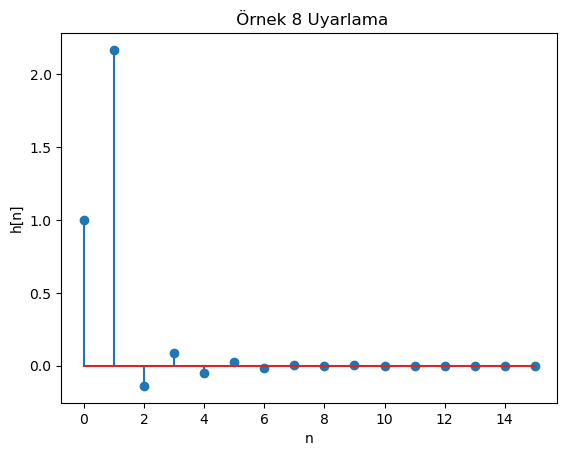

In [11]:
num = np.array([1,3,11/6,1/3]) 
denum = np.array([1,5/6,1/6,0]) # coeffs of denum
n, x = sgnl.dimpulse((num, denum, 1),x0=0, n=16)
plt.figure()
plt.stem(n,np.squeeze(x))
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Örnek-8'deki gibi çözüm")

### Örnek-8'deki gibi çözüm: 

Text(0, 0.5, '$h_{8}[n]$')

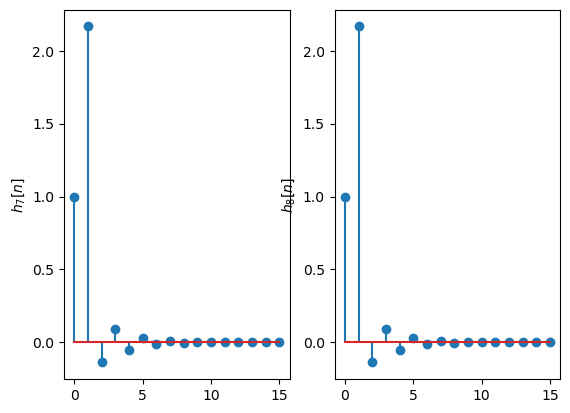

In [12]:
n = np.linspace(0,15,16)
x = np.zeros(len(n))

for k in range(len(n)):
    x[k]=2*dirac(n[k]-1)+dirac(n[k])+(-1)*math.pow(-1/2,(n[k]))*step(n[k]) + (1)*step(n[k])*math.pow(-1/3,(n[k]))

num = np.array([1,3,11/6,1/3]) 
denum = np.array([1,5/6,1/6,0]) # coeffs of denum
n8, x8 = sgnl.dimpulse((num, denum, 1),x0=0, n=16)


plt.subplot(1,2,1)
plt.stem(n, x)
plt.ylabel('$h_{7}[n]$')
plt.subplot(1,2,2)
plt.stem(n8, np.squeeze(x8))
plt.ylabel('$h_{8}[n]$')


### Verilen ön çalışma kodları incelediğnde ve bu soru için elde ettiğimiz katsayılara uyarlandığında gözlemleyebilriiz ki elde ettiğimiz değerler ile elde ettiğimiz grafiklerin aynı olduğu gözlemlenmektedir. Buradan elde ettiğimiz sonucun doğru olduğunu çıkarabiliriiz. 

# Soru-4) 

###  $ H(z) = \frac{10(1-\frac{1}{\sqrt{2}}z^{-1})}{(1-e^{j\frac{\pi}{4}z^{-1}})(1-e^{-j\frac{\pi}{4}z^{-1}})(1-0.5z^{-1})}$ 

### şeklinde paydalara ayırarak A,B ve C katsayılarını bulacağız.
### $ = \frac{A}{(1-e^{j\frac{\pi}{4}z^{-1}})}+\frac{B}{(1-e^{-j\frac{\pi}{4}z^{-1}})}+\frac{C}{(1-0.5z^{-1})}$ 
### İşlemler karmaşık sayı olduğundan dolayı kökler aşağıda bilgisayara hesaplatılmıştır ve değerler şöyledir:
### A Değeri: (5.953717849152731-3.256196415254552j)
### B Değeri: (5.953717849152731+3.256196415254552j)
### C Değeri: (-1.9074356983054608+0j)

In [18]:
kök=2**0.5 #Karekök
print("A Değeri:",(10-(10/kök)*np.exp(-np.pi*1j/4))/((1-np.exp(-1j*np.pi/2))*(1-1/2*np.exp(-1j*np.pi/4))))
print("B Değeri:",(10-(10/kök)*np.exp(np.pi*1j/4))/((1-np.exp(1j*np.pi/2))*(1-1/2*np.exp(1j*np.pi/4))))
print("C Değeri:",(10-(20/kök))/((1-2*np.exp(1j*np.pi/4))*(1-2*np.exp(-1j*np.pi/4))))

A Değeri: (5.953717849152731-3.256196415254552j)
B Değeri: (5.953717849152731+3.256196415254552j)
C Değeri: (-1.9074356983054608+0j)


### Örnek-7'deki gibi çözüm: 
 

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_14680\1537570859.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  x[k]=(5.9535 - 3.2568j)*(exp(1j*pi*n[k]/4))*step(n[k]) + (5.9535 + 3.2568j)*exp(-1j*pi*n[k]/4)*step(n[k]) + (-1.9071)*((math.pow(1/2,n[k]))*step(n[k]))


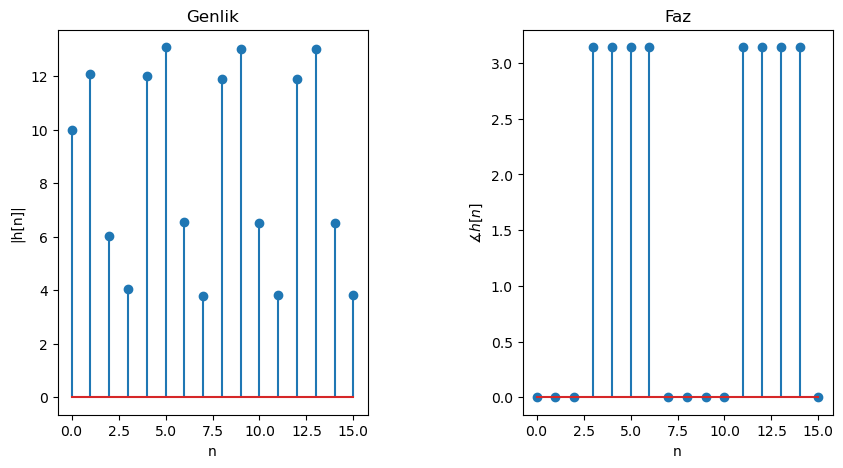

In [20]:
n = np.linspace(0,15,16)
x = np.zeros(len(n))
pi = np.pi
exp = np.exp

for k in range(len(n)):
    x[k]=(5.9535 - 3.2568j)*(exp(1j*pi*n[k]/4))*step(n[k]) + (5.9535 + 3.2568j)*exp(-1j*pi*n[k]/4)*step(n[k]) + (-1.9071)*((math.pow(1/2,n[k]))*step(n[k])) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.stem(n, np.abs(x))
ax1.set_xlabel("n")
ax1.set_ylabel("|h[n]|")
ax1.set_title("Genlik")
ax2.stem(n, np.angle(x))
ax2.set_xlabel("n")
ax2.set_ylabel("$\\measuredangle h[n]$")
ax2.set_title("Faz")
plt.subplots_adjust(wspace=0.5)
plt.show()

#print(x)  

### Örnek-8'deki gibi çözüm: 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_ltisys.py:3505: ComplexWarning: Casting complex values to real discards the imaginary part
  xout[i+1, :] = (np.dot(system.A, xout[i, :]) +
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_ltisys.py:3507: ComplexWarning: Casting complex values to real discards the imaginary part
  yout[i, :] = (np.dot(system.C, xout[i, :]) +
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_ltisys.py:3511: ComplexWarning: Casting complex values to real discards the imaginary part
  yout[out_samples-1, :] = (np.dot(system.C, xout[out_samples-1, :]) +


Text(0.5, 1.0, 'Faz')

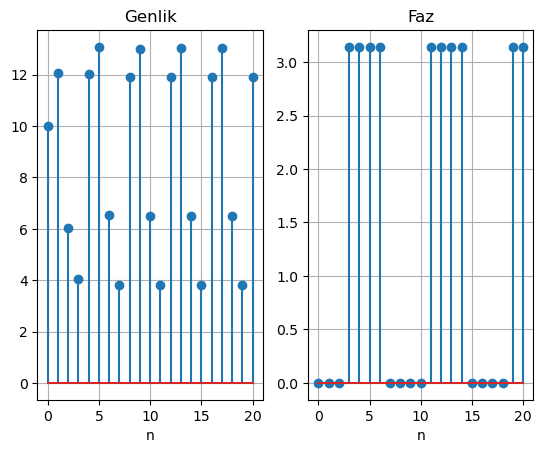

In [22]:
num = np.array([10,-10/kök,0,0])
denum = np.array([1,(-np.exp(-1j*np.pi/4)-np.exp(1j*np.pi/4)-1/2),(1+np.exp(-1j*np.pi/4)*1/2+np.exp(1j*np.pi/4)*1/2),-1/2])
n, x = sgnl.dimpulse((num, denum, 1),x0=0, n=21)
plt.figure()
plt.subplot(1,2,1)
plt.stem(n, np.squeeze(np.abs(x)))
plt.grid(True)
plt.xlabel("n")
plt.title("Genlik")
plt.subplot(1,2,2)
plt.stem(n, np.squeeze(np.angle(x)))
plt.grid(True)
plt.xlabel("n")
plt.title("Faz")

### Örnek-9'deki gibi çözüm: 

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_14680\1268081119.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  h[n] = (5.9537178-3.2561964j)*(np.exp(1j*np.pi/4))**n*np.heaviside(n,1)+(5.9537178+3.2561964j)*(np.exp(-1j*np.pi/4))**n*np.heaviside(n,1)-1.9074*(1/2)**n*np.heaviside(n,1)


Text(0.5, 0, 'n')

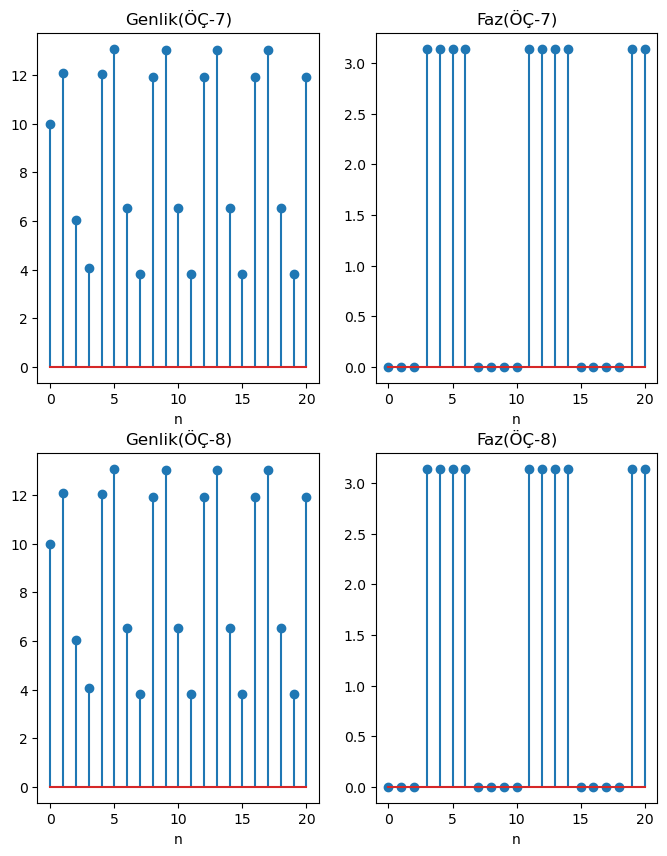

In [23]:
#örnek-7
n1=np.arange(0,21,1)
h=np.zeros(len(n1))
genlik=np.zeros(len(n1))
faz=np.zeros(len(n1))
for n in range(0,len(n1)):
    h[n] = (5.9537178-3.2561964j)*(np.exp(1j*np.pi/4))**n*np.heaviside(n,1)+(5.9537178+3.2561964j)*(np.exp(-1j*np.pi/4))**n*np.heaviside(n,1)-1.9074*(1/2)**n*np.heaviside(n,1)

num = np.array([10,-10/kök,0,0])
denum = np.array([1,(-np.exp(-1j*np.pi/4)-np.exp(1j*np.pi/4)-1/2),(1+np.exp(-1j*np.pi/4)*1/2+np.exp(1j*np.pi/4)*1/2),-1/2])
n2, xpse = sgnl.dimpulse((num, denum, 1),x0=0, n=21)
xpse = np.squeeze(xpse)

plt.figure(figsize = (8,10))
plt.subplot(2,2,1), 
plt.stem(n1, np.abs(h)), 
plt.title("Genlik(ÖÇ-7)")
plt.xlabel("n")
plt.subplot(2,2,2), 
plt.stem(n1, np.angle(h)), 
plt.title("Faz(ÖÇ-7)")
plt.xlabel('n')
plt.subplot(2,2,3), 
plt.stem(n1, np.abs(xpse)), 
plt.title("Genlik(ÖÇ-8)")
plt.xlabel("n")
plt.subplot(2,2,4), 
plt.stem(n1, np.angle(xpse)), 
plt.title("Faz(ÖÇ-8)")
plt.xlabel('n')

### Yukarıdaki işlemler yapıldığında elde edilen grafikler incelendiğinde görülmektedir ki; elde edilen grafikler birbirleriyle örtüşmektedir ve bu da bize elde ettiğimiz sonucun doğruluğunu göstermektedir. 

# Soru-5) 

Bu laboratuvar çalışmasında, z-dönüşümüne odaklanıldı ve z-dönüşümünün özellikleri, işlevi, avantajları ve dezavantajları incelendi. Yapılan işlemler sonucunda, zaman alanı yerine z-düzlemine geçerek bazı sistemleri daha kolay incelemek mümkün hale geldi. Örneğin, bir sistemin kararlılığı ve nedenselliği z-düzleminde daha kolay incelenebilir hale geldi. Bu nedenle, laboratuvar çalışması öncesinde verilen ön çalışmalar ve kodlar detaylı bir şekilde incelendi ve çözülecek problemlerin nasıl ele alınacağına yönelik araştırmalar yapıldı.

Verilen kodlar ve araştırmalar sonucunda elde edilen çözümler grafikler üzerinde doğrulandı. Bu sayede, z-dönüşümü sayesinde elde edilen sonuçların doğru olduğu teyit edildi.

Z-dönüşümü, bir zaman serisini frekans bileşenleri halinde ifade etmek için kullanılan bir matematiksel yöntemdir. Bu dönüşüm, bir sinyalin frekans bileşenlerini hesaplamak için kullanılır ve daha sonra bu bileşenleri analiz etmek veya filtrelemek için kullanılabilir. Z-dönüşümü sayesinde, frekansları belirli bir aralıkta olan sinyallerin analizi daha kolay hale gelir.

Z-dönüşümünün avantajlarından biri, zaman alanı verilerinin sıklık alanı verilerine dönüştürülmesidir. Bu sayede, sinyallerin frekans bileşenleri daha kolay analiz edilebilir. Ayrıca, zaman alanındaki verilerdeki gürültüyü azaltabilir ve sinyallerin özelliklerini daha iyi gözlemlememizi sağlar.

Ancak, z-dönüşümünün dezavantajları da vardır. Örneğin, sinyallerin frekans bileşenlerinin hesaplanması, bazı durumlarda doğru sonuçlar vermez. Ayrıca, z-dönüşümü zaman alanında bulunmayan bilgileri kaybedebilir ve bu da analiz sonuçlarını etkileyebilir.

Sonuç olarak, z-dönüşümü, sinyallerin frekans bileşenlerini hesaplamak için kullanılan bir yöntemdir. Bu yöntem sayesinde, sinyallerin özellikleri daha iyi analiz edilebilir ve filtrelenir. Ancak, z-dönüşümünün bazı dezavantajları da vardır ve bu yöntemin kullanımı dikkatli bir şekilde yapılmalıdır.